# Labelisation: Finding the rotation

## Intro

The goal of this notebook is to find the transformation from the coordinates of the microscope to the coordinates of the final stiched image in Prince

## Set up

In [89]:
from amftrack.util.sys import data_path, get_current_folders, update_plate_info
from amftrack.util.file import chose_file
from amftrack.util.plot import show_image
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment
import os
import matplotlib.pyplot as plt
%matplotlib notebook

## Points of interest

Coordinates of the image taken on the microscope

In [90]:
image_names = ["20220324_Plate907_013", "20220324_Plate907_050", "20220324_Plate907_041", "20220324_Plate907_033"]

In [91]:
image_path = [chose_file(os.path.join(data_path, "width1/groundtruth", image_name)) for image_name in image_names]  

In [92]:
i = 0

<IPython.core.display.Javascript object>


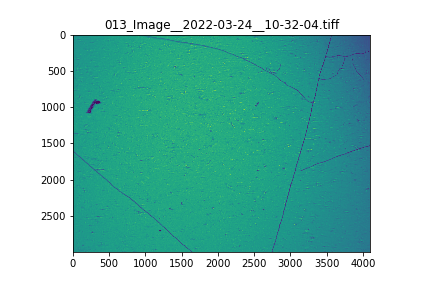

In [93]:
show_image(image_path[i])
plt.title(image_names[i])
i=(i+1)%len(image_path)

Find the position on the image

In [94]:
coord_in_image = [[2213, 2079], [2476, 1780], [2088, 1828], [1640, 1502]]

Coordinates of the image

In [95]:
coord_of_image = [[71020, 39440], [46800, 54180], [47080, 49780], [57920, 51280]]

Original position of the point of interest:

In [96]:
coord = [[coord_in_image[j][i] + coord_of_image[j][i] for i in [0,1]] for j in range(len(coord_of_image))]

## Finding the points on the stiched image

In [97]:
snapshot_names = ["013_Image__2022-03-24__10-32-04.tiff", "050_Image__2022-03-24__13-03-53.tiff", "040_Image__2022-03-24__11-45-48.tiff", "033_Image__2022-03-24__11-38-53.tiff"]
snapshot_paths = [os.path.join(data_path, "width1/snapshot/20220324_Plate907_Snapshots", s) for s in snapshot_names]

In [98]:
i = 0

In [99]:
show_image(snapshot_paths[i])
plt.title(snapshot_names[i])
i=(i+1)%len(image_path)

In [100]:
# print image original image around the point of interest

## BROUILLON

In [101]:
directory = "/data/felix/width1/full_plates/"

In [102]:
update_plate_info(directory)

analysed:   0%|          | 0/2 [00:00<?, ?it/s]

In [103]:
all_folders = get_current_folders(directory)
len(all_folders)

2

In [104]:
folders = all_folders.loc[all_folders['folder']=='20220325_1423_Plate907']
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp
12705,/data/felix/width1/full_plates/20220325_1423_P...,907,9,'Carrot','A5','001P100N100C','Y','-',20220321,25,...,False,False,False,False,False,False,False,"25.03.2022, 14:23:",20220325_1423_Plate907,NaN


In [105]:
i = 0

In [106]:
plate = int(list(folders['folder'])[i].split('_')[-1][5:])
folder_list = list(folders['folder'])
directory_name = folder_list[i]

In [107]:
plate

907

In [108]:
directory

'/data/felix/width1/full_plates/'

In [ ]:
exp = Experiment(plate, directory)

In [109]:
exp.load(folders.loc[folders['folder']==directory_name],labeled=False)

2022-03-25 14:23:00


FileNotFoundError: [Errno 2] No such file or directory: '/data/felix/width1/full_plates/20220325_1423_Plate907/Analysis/nx_graph_pruned.p'